# SQL
 I use python to learn SQL. Intall pandasql (for simpler quieries) and duckdb (for more complex ones) and then load them.

In [1]:
#pip install pandasql

In [3]:
#pip install duckdb

In [58]:
import duckdb
from duckdb import query_df
from pandasql import sqldf

import pandas as pd
import os

In [7]:
os.chdir("./")

In [196]:
#print(os.getcwd())

## Load and Inspect the data
a little reminder to how to work with data in pandas

In [12]:
df = pd.read_csv("netflix_titles.csv")

In [14]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [16]:
df.shape

(8807, 12)

In [18]:
# ue iloc to explre the data
# iloc[0,1] means row 1, column 2
df.iloc[0, 1]

'Movie'

In [20]:
# row 1 values
df.iloc[0, ]

show_id                                                        s1
type                                                        Movie
title                                        Dick Johnson Is Dead
director                                          Kirsten Johnson
cast                                                          NaN
country                                             United States
date_added                                     September 25, 2021
release_year                                                 2020
rating                                                      PG-13
duration                                                   90 min
listed_in                                           Documentaries
description     As her father nears the end of his life, filmm...
Name: 0, dtype: object

In [22]:
# all rows, column 2
df.iloc[:, 1].head

<bound method NDFrame.head of 0         Movie
1       TV Show
2       TV Show
3       TV Show
4       TV Show
         ...   
8802      Movie
8803    TV Show
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 8807, dtype: object>

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [26]:
# access the columns using dot
# use some functions by dot
df.release_year.min() , df.release_year.max()

(1925, 2021)

In [28]:
# select columns and filter based on values
tv_shows = df[df['type'] == 'TV Show'][['title','director', 'country']]
tv_shows.head()

,title,director,country
1,Blood & Water,NaN,South Africa
2,Ganglands,Julien Leclercq,NaN
3,Jailbirds New Orleans,NaN,NaN
4,Kota Factory,NaN,India
5,Midnight Mass,Mike Flanagan,NaN


## Write your first query: select, from, where
use "select" for choosing columns 

"from" for choosing a dataset (table) 

"where" for specifying rows.


In [33]:
# select, from, where
# use """ to create a query
# * means eveything

query_1 = """select * 
from df where 
release_year > 2020"""
result = sqldf(query_1, globals())  
print(result)

    show_id     type                      title         director  \
0        s2  TV Show              Blood & Water             None   
1        s3  TV Show                  Ganglands  Julien Leclercq   
2        s4  TV Show      Jailbirds New Orleans             None   
3        s5  TV Show               Kota Factory             None   
4        s6  TV Show              Midnight Mass    Mike Flanagan   
..      ...      ...                        ...              ...   
587   s1469    Movie  What Happened to Mr. Cha?     Kim Dong-kyu   
588   s1552  TV Show                      Hilda             None   
589   s1697  TV Show               Polly Pocket             None   
590   s2921  TV Show              Love Is Blind             None   
591   s8438  TV Show     The Netflix Afterparty             None   

                                                  cast  \
0    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
2        

In [36]:
# select, from, where
# use """ to create a query
# * means eveything

query_1 = """select * 
from df where 
release_year > 2020"""

result = sqldf(query_1, globals())  
print(result)

    show_id     type                      title         director  \
0        s2  TV Show              Blood & Water             None   
1        s3  TV Show                  Ganglands  Julien Leclercq   
2        s4  TV Show      Jailbirds New Orleans             None   
3        s5  TV Show               Kota Factory             None   
4        s6  TV Show              Midnight Mass    Mike Flanagan   
..      ...      ...                        ...              ...   
587   s1469    Movie  What Happened to Mr. Cha?     Kim Dong-kyu   
588   s1552  TV Show                      Hilda             None   
589   s1697  TV Show               Polly Pocket             None   
590   s2921  TV Show              Love Is Blind             None   
591   s8438  TV Show     The Netflix Afterparty             None   

                                                  cast  \
0    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
1    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...   
2        

In [38]:


query_1 = """select `cast` 
from df 
where release_year > 2020"""
# you must use `` becuase cast itself has a meaning in SQL
result = sqldf(query_1, globals()) 
print(result)

                                                  cast
0    Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
1    Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
2                                                 None
3    Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
4    Kate Siegel, Zach Gilford, Hamish Linklater, H...
..                                                 ...
587           Cha In-pyo, Cho Dal-hwan, Song Jae-ryong
588  Bella Ramsey, Ameerah Falzon-Ojo, Oliver Nelso...
589  Emily Tennant, Shannon Chan-Kent, Kazumi Evans...
590                        Nick Lachey, Vanessa Lachey
591       David Spade, London Hughes, Fortune Feimster

[592 rows x 1 columns]


In [40]:


# Sample DataFrame
df_1 = pd.DataFrame({
    "id": [1, 2, 3],
    "name": ["Alice", "Bob", "Charlie"],
    "age": [25, 30, 22]
})

# SQL Query
query = """select * 
from df_1 
where age > 23"""
result = sqldf(query, globals())  # Use globals() to access df
print(result)

   id   name  age
0   1  Alice   25
1   2    Bob   30


In [42]:
# count()
query_1 = """select count() 
from df 
where director = 'Julien Leclercq'"""

result = sqldf(query_1, globals())  
print(result)

   count()
0        3


In [44]:
# Other aggregate function: min(), max(), avg(), sum()
print(df.columns)
# count()
query_1 = """select max(release_year) 
from df 
where director = 'Julien Leclercq'"""

result = sqldf(query_1, globals())  
print(result)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
   max(release_year)
0               2021


## group by

In [47]:
# group by
query_1 = """select type, count(director)
from df 
group by type"""
# counts the number of rows tha director is non-null
# note that you need to use ',' after select when selecting several columns or expressions
result = sqldf(query_1, globals()) 
print(result)
# there are 5943 directors for Movies and 230 for TV shows. But these are not distinct directors.

      type  count(director)
0    Movie             5943
1  TV Show              230


In [49]:
# group by
query_1 = """select type, count(distinct(director))
from df 
group by type"""
# note that you need to use ',' after select when selecting several columns or expressions
result = sqldf(query_1, globals()) 
print(result)
# there are 5943 directors for Movies and 230 for TV shows.  these are distinct directors. 
# but again if there is a , b in a row for a director and a for another row, these two are considered disinct.
# if interested you can use a more complex library duckdb to unnest those values that contain ","
# if interested read several queries below:

      type  count(distinct(director))
0    Movie                       4354
1  TV Show                        222


### more cmplex queris using duckdb library

In [60]:
# how many countries are there?
# using duckdb we can write a more complex query
query = """
SELECT DISTINCT TRIM(value.unnest) AS country
FROM df,
LATERAL UNNEST(STRING_SPLIT(country, ',')) AS value
WHERE country IS NOT NULL
"""
# see how it works?
# 'first': in the Lateral line: it unnest string and calls it value
# then in select line, access to unnest values using .unnest, then trim and distinct

duckdb.query_df(df, 'df', query).df()

,country
0,Romania
1,Canada
2,France
3,Singapore
4,Bulgaria
...,...
118,Samoa
119,Vatican City
120,Serbia
121,Cameroon


In [62]:
# how manu directors?
query = """
select DISTINCT TRIM(value.unnest) AS director
FROM df,
LATERAL UNNEST(STRING_SPLIT(director, ',')) AS value
WHERE director IS NOT NULL
"""

query_df(df, 'df', query).df()

,director
0,Hanns-Bruno Kammertöns
1,Michael Wech
2,Zoya Akhtar
3,Takashi Yamazaki
4,Ajay Bhuyan
...,...
4988,Ryan Fleck
4989,Jean-Loup Felicioli
4990,Spencer Williams
4991,Joe Johnston


In [64]:
# how manu directors?
query = """
select count(DISTINCT TRIM(value.unnest)) AS directors_count
FROM df,
LATERAL UNNEST(STRING_SPLIT(director, ',')) AS value
WHERE director IS NOT NULL
"""

query_df(df, 'df', query).df()

,directors_count
0,4993


In [66]:
# Now, how many distict directors are there for movies and tv shows separately?
query = """
SELECT 
    type,
    COUNT(DISTINCT TRIM(directors.unnest)) AS distinct_directors
FROM df,
LATERAL UNNEST(STRING_SPLIT(director, ',')) AS directors
GROUP BY type
"""

result = query_df(df, 'df', query).df()
print(result)

      type  distinct_directors
0  TV Show                 299
1    Movie                4777


### back to basics

In [69]:
# group by, if we put 1 in count()
query_1 = """select type, count(1) 
from df 
group by type"""
# note that you need to use ',' after select
result = sqldf(query_1, globals())  
print(result)

      type  count(1)
0    Movie      6131
1  TV Show      2676


In [71]:
# group by, if we put 1 in count()
# is the same as:
query_1 = "select count() from df group by type"

result = sqldf(query_1, globals())  
print(result)

   count()
0     6131
1     2676


## group y .... having

In [74]:
# GROUP BY ... HAVING
# HAVING is used in combination with GROUP BY to ignore groups that don't meet certain criteria.
query_1 = """select rating, count(distinct country)
from df 
group by rating 
having count(distinct country) > 10
"""

result = sqldf(query_1, globals())  
print(result)

   rating  count(distinct country)
0       G                       12
1      NR                       31
2      PG                       67
3   PG-13                      121
4       R                      182
5   TV-14                      169
6    TV-G                       42
7   TV-MA                      314
8   TV-PG                      108
9    TV-Y                       55
10  TV-Y7                       60


In [76]:
# GROUP BY ... HAVING

query_1 = """select rating, count(distinct(country))
from df 
where release_year > 2020 
group by rating 
having count(distinct(country)) > 10
"""
# note that you need to use ',' after select
result = sqldf(query_1, globals())  
print(result)

  rating  count(distinct(country))
0  TV-14                        30
1  TV-MA                        45
2  TV-PG                        11
3  TV-Y7                        12


## order by

In [79]:
#order by
# which directors have the most work?
query_1 = """
select director, count() 
from df 
group by director 
order by count() desc"""

result = sqldf(query_1, globals())  
print(result)

                    director  count()
0                       None     2634
1              Rajiv Chilaka       19
2     Raúl Campos, Jan Suter       18
3                Suhas Kadav       16
4               Marcus Raboy       16
...                      ...      ...
4524              Aamir Khan        1
4525            Aamir Bashir        1
4526         Aadish Keluskar        1
4527               A. Salaam        1
4528            A. Raajdheep        1

[4529 rows x 2 columns]


### fancy an accurate measure?

use duckdb

In [82]:

query = """
SELECT 
    DISTINCT TRIM(director.unnest) AS distinct_director,
    count()
FROM df,
LATERAL UNNEST(STRING_SPLIT(director, ',')) AS director
GROUP BY distinct_director
order by count() desc
"""
#using duckdb:
result = query_df(df, 'df', query).df()
print(result)

     distinct_director  count_star()
0        Rajiv Chilaka            22
1            Jan Suter            21
2          Raúl Campos            19
3         Marcus Raboy            16
4          Suhas Kadav            16
...                ...           ...
4988  Benoît Philippon             1
4989       Yim Pilsung             1
4990      Harry Elfont             1
4991        Alex Smith             1
4992       Annie Clark             1

[4993 rows x 2 columns]


### back to basics
## case when

In [85]:
# AS , case when
#which movies and tv shows have highest number of countries?
query_1 = """
select title, country,
CASE WHEN country = 'None' THEN 0 ELSE LENGTH(country) - LENGTH(REPLACE(country, ',', '')) + 1 END AS num_countries 
from df 
order by num_countries desc"""

result = sqldf(query_1, globals())  
print(result)

                             title  \
0                         Barbecue   
1              The Look of Silence   
2                  Shaun the Sheep   
3     The Professor and the Madman   
4                         The Take   
...                            ...   
8802        Westside vs. the World   
8803        World's Weirdest Homes   
8804                          Yoko   
8805                           YOM   
8806                   Zombie Dumb   

                                                country  num_countries  
0     Australia, Armenia, Japan, Jordan, Mexico, Mon...           12.0  
1     Denmark, Indonesia, Finland, Norway, United Ki...           10.0  
2     United Kingdom, Finland, Germany, United State...            8.0  
3     Ireland, France, Iceland, United States, Mexic...            8.0  
4     United Kingdom, France, United States, Belgium...            7.0  
...                                                 ...            ...  
8802                            

In [87]:
# AS , count, group by, order by
#which decade has the most movies and tv shows?
query_1 = """
select  (release_year / 10) * 10 as decade, count()
from df 
group by decade 
order by count() desc"""

result = sqldf(query_1, globals())  
print(result)

   decade  count()
0    2010     5927
1    2020     1545
2    2000      810
3    1990      274
4    1980      129
5    1970       70
6    1960       25
7    1940       15
8    1950       11
9    1920        1


    release_year  title_len_avg
0           1925      33.000000
1           1942      17.000000
2           1943      36.666667
3           1944      26.666667
4           1945      23.000000
..           ...            ...
69          2017      17.672481
70          2018      18.044464
71          2019      18.329126
72          2020      19.000000
73          2021      18.415541

[74 rows x 2 columns]


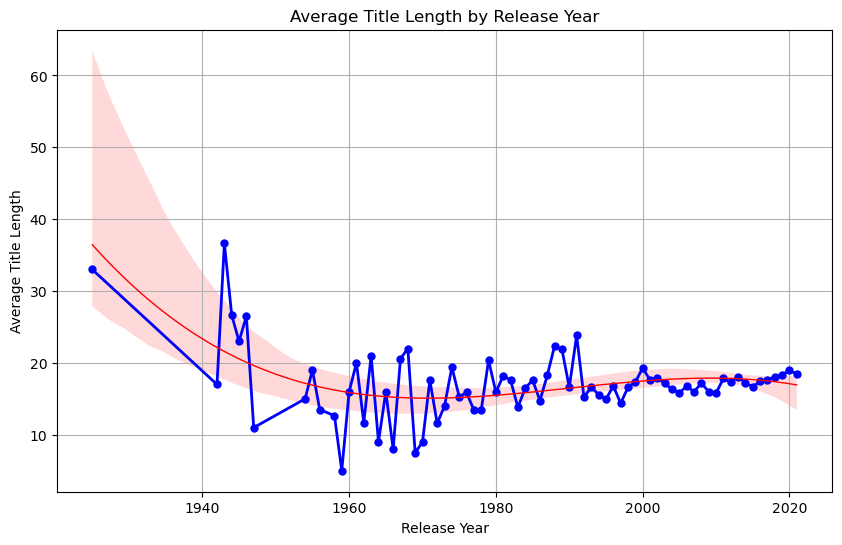

In [89]:
#plot of length of titles vs time
query_1 = """
select release_year , avg(length(title)) as title_len_avg 
from df 
group by release_year  
order by release_year  """

result = sqldf(query_1, globals()) 
print(result)

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.plot(result['release_year'], result['title_len_avg'],marker='o', color='b', linestyle='-', linewidth=2, markersize=5)
sns.regplot(x='release_year', y='title_len_avg', data=result, scatter=False, color='r', line_kws={"linewidth": 1, "color": "r"}, order=3)
plt.xlabel('Release Year')
plt.ylabel('Average Title Length')
plt.title('Average Title Length by Release Year')
plt.grid(True)

#note that order in th regplot (1 to higher), changes the regression line

## distinct

In [91]:
#distinct
#how many decades are there?
query_1 = """
select count(distinct (release_year / 10) * 10) AS num_decades 
FROM df
"""

result = sqldf(query_1, globals())  
print(result)

   num_decades
0           10


## with ... as
A common table expression (or CTE) is a temporary table that you return within your query. CTEs are helpful for splitting your queries into readable chunks, and you can write queries against them.


In [95]:
# with ... as, like

query_1 = """
    with New_US_Movies as
    (
    select title, release_year 
    from df 
    where release_year > 2009 and type = 'Movie'and country like '%United State%' 
    )
    select title, release_year 
    from New_US_Movies
    """

result = sqldf(query_1, globals()) 
print(result)

                          title  release_year
0          Dick Johnson Is Dead          2020
1                  The Starling          2021
2                     Grown Ups          2010
3                    Dark Skies          2013
4                      Paranoia          2013
...                         ...           ...
2103                  يوم الدين          2018
2104    Yo-Kai Watch: The Movie          2016
2105                Yoga Hosers          2016
2106  You Can’t Fight Christmas          2017
2107                Young Adult          2011

[2108 rows x 2 columns]


In [97]:
import pandas as pd

#df_1 = pd.read_csv("rating.csv", low_memory = False)
#df_2 = pd.read_csv("anime.csv")

In [99]:
# choose 100 random anime_id to reduce the size of the datasets
#random_anime_ids = df_1['anime_id'].drop_duplicates().sample(n=100, random_state=42)
#print(random_anime_ids)

In [101]:
#reduce the size of the datasets
#df_3 = df_1[df_1['anime_id'].isin(random_anime_ids)]
#df_4 = df_2[df_2['anime_id'].isin(random_anime_ids)]

In [103]:
#df_3.to_csv("rating_reduced_size.csv", index=False)  
#df_4.to_csv("anime_reduced_size.csv", index=False) 

In [105]:
df_3 = pd.read_csv("rating_reduced_size.csv", low_memory = False)
df_4 = pd.read_csv("anime_reduced_size.csv")

In [107]:
df_3.columns  , df_4.columns

(Index(['user_id', 'anime_id', 'rating'], dtype='object'),
 Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object'))

In [109]:
df_3.head()

,user_id,anime_id,rating
0,1,15451,10
1,1,20785,-1
2,4,17777,-1
3,5,1887,3
4,5,9220,5


In [111]:
df_4.head()

,anime_id,name,genre,type,episodes,rating,members
0,28851,Koe no Katachi,"Drama, School, Shounen",Movie,1,9.05,102733
1,4107,Tengen Toppa Gurren Lagann Movie: Gurren-hen,"Action, Comedy, Mecha",Movie,1,8.22,72933
2,4053,Prince of Tennis: The National Tournament Finals,"Comedy, School, Shounen, Sports",OVA,7,8.15,21020
3,15451,High School DxD New,"Action, Comedy, Demons, Ecchi, Harem, Romance,...",TV,12,7.87,266657
4,1887,Lucky☆Star,"Comedy, Parody, School, Slice of Life",TV,24,7.87,305837


In [113]:
df_3.shape , df_4.shape

((68423, 3), (100, 7))

## join

join ... on ....

In [116]:
# join 
#join comes before group

query_1 = """
select df_4.name, avg(df_3.rating) as avg_rating , df_4.rating
from df_3
inner join df_4 on df_3.anime_id = df_4.anime_id
group by df_3.anime_id
"""

result = sqldf(query_1, globals())  
print(result)
# the rating from df_4 is so different from avg rating of users from df_3. in the nedxt code let's reducr the difference.

                                                 name  avg_rating  rating
0                                   Scrapped Princess    5.984932    7.52
1                    Green Green Thirteen: Erolutions    4.717622    6.26
2                            Astro Boy: Tetsuwan Atom    5.119883    7.02
3                 Chicchana Yukitsukai Sugar Specials    4.840237    7.09
4                        Chou Denji Robo Combattler V    3.937500    6.93
..                                                ...         ...     ...
95                                  Sakamoto desu ga?    6.177234    7.67
96  Minions x Godzilla x Toho Cinema Collaboration...    4.250000    5.75
97                Persona 3 the Movie Meets “Walkman”    2.687500    5.91
98               Hikari: Kariya wo Tsunagu Monogatari    2.500000    5.52
99                                 Ragnastrike Angels    3.280374    4.42

[100 rows x 3 columns]


In [118]:
# join ... on ... + case when
query_1 = """
    select df_4.name, avg(case when df_3.rating > -1 then df_3.rating else 0 end) as avg_rating , df_4.rating
    from df_3
    inner join df_4 on df_3.anime_id = df_4.anime_id
    group by df_3.anime_id
    """

result = sqldf(query_1, globals())  
print(result)
# results are better, but we can make them een better with where 

                                                 name  avg_rating  rating
0                                   Scrapped Princess    6.178539    7.52
1                    Green Green Thirteen: Erolutions    4.953999    6.26
2                            Astro Boy: Tetsuwan Atom    5.374269    7.02
3                 Chicchana Yukitsukai Sugar Specials    5.136095    7.09
4                        Chou Denji Robo Combattler V    4.312500    6.93
..                                                ...         ...     ...
95                                  Sakamoto desu ga?    6.357434    7.67
96  Minions x Godzilla x Toho Cinema Collaboration...    4.250000    5.75
97                Persona 3 the Movie Meets “Walkman”    3.062500    5.91
98               Hikari: Kariya wo Tsunagu Monogatari    3.000000    5.52
99                                 Ragnastrike Angels    3.532710    4.42

[100 rows x 3 columns]


In [120]:
# join 
query_1 = """
select 
    df_4.name, 
    avg(df_3.rating ) as avg_rating , 
    df_4.rating
from df_3
inner join df_4 on df_3.anime_id = df_4.anime_id
where df_3.rating > -1
group by df_3.anime_id
    """

result = sqldf(query_1, globals())  
print(result)



                                                 name  avg_rating  rating
0                                   Scrapped Princess    7.661948    7.52
1                    Green Green Thirteen: Erolutions    6.487488    6.26
2                            Astro Boy: Tetsuwan Atom    7.207843    7.02
3                 Chicchana Yukitsukai Sugar Specials    7.294118    7.09
4                        Chou Denji Robo Combattler V    6.900000    6.93
..                                                ...         ...     ...
86                                  Sakamoto desu ga?    7.754862    7.67
87  Minions x Godzilla x Toho Cinema Collaboration...    4.250000    5.75
88                Persona 3 the Movie Meets “Walkman”    4.900000    5.91
89               Hikari: Kariya wo Tsunagu Monogatari    6.000000    5.52
90                                 Ragnastrike Angels    4.725000    4.42

[91 rows x 3 columns]


#### why where is not after from?
Here's the typical order you write SQL:


SELECT ...

FROM ...

[JOIN ... ON ...]

WHERE ...

GROUP BY ...

HAVING ...

ORDER BY ...

## Join

In [124]:
# Walmart Sales Forecast dtaset from kaggle
# https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast
df_stores = pd.read_csv("stores.csv")
df_features = pd.read_csv("features.csv")
df_train = pd.read_csv('train.csv')

In [126]:
df_stores.head()  

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [128]:
df_stores.shape

(45, 3)

In [130]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [132]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [134]:
df_stores.shape , df_features.shape , df_train.shape

((45, 3), (8190, 12), (421570, 5))

In [136]:
#how many stores of each type?
query_1 = """
select 
    type, 
    count()
from df_stores
group by type
    """

result = sqldf(query_1, globals()) 
print(result)

  Type  count()
0    A       22
1    B       17
2    C        6


In [138]:
#which store has the least departments?
query_1 = """
select 
    store, 
    count(distinct(dept)) as dept_count
from df_train
group by store
order by dept_count
    """

result = sqldf(query_1, globals())  
print(result)

    Store  dept_count
0      43          61
1      37          62
2      42          62
3      44          62
4      33          63
5      36          63
6      38          63
7      30          64
8       3          72
9       5          72
10      9          73
11     35          74
12     45          74
13     12          75
14     39          75
15      7          76
16      8          76
17     16          76
18     17          76
19     22          76
20     26          76
21     31          76
22      1          77
23      6          77
24     10          77
25     14          77
26     21          77
27     23          77
28     24          77
29     25          77
30     28          77
31     29          77
32     32          77
33     40          77
34     41          77
35      2          78
36      4          78
37     11          78
38     18          78
39     20          78
40     27          78
41     34          78
42     13          79
43     15          79
44     19 

In [139]:
#For each store, what is the average temperature and average fuel price separately for holidays and non-holidays for stores of type 'A' only
query_1 = """
select
    f.Store,
    f.IsHoliday,
    avg(f.Temperature) as avg_temperature,
    avg(f.Fuel_Price) as avg_fuel_price
from df_features as f
inner join 
    df_stores as s
    on f.Store = s.Store
where s.Type = 'A'
group by  f.Store, IsHoliday
order by f.Store
"""
result = sqldf(query_1, globals())
print(result)

    Store  IsHoliday  avg_temperature  avg_fuel_price
0       1          0        67.698757        3.269722
1       1          1        56.684615        3.123000
2       2          0        67.540178        3.269722
3       2          1        56.175385        3.123000
4       4          0        62.365858        3.264645
5       4          1        49.076923        3.128000
6       6          0        69.243136        3.269722
7       6          1        58.904615        3.123000
8       8          0        62.132308        3.269722
9       8          1        48.803077        3.123000
10     11          0        71.857160        3.269722
11     11          1        62.899231        3.123000
12     13          0        53.183491        3.341260
13     13          1        40.932308        3.166308
14     14          0        57.131302        3.482509
15     14          1        44.879231        3.397154
16     19          0        51.693550        3.648408
17     19          1        

## union

Unions stack results from multiple queries into a single result set.

union: Combines rows from both queries and removes duplicates.

union all: Combines rows from both queries including duplicates.

In [143]:
#Show all (Store, Dept) combinations from 2010-12-24 and 2010-12-31, including duplicates if they appeared both weeks.
query = """
select
    Store,
    Dept
from df_train
where Date = '2010-12-24'
union all
select 
    Store,
    Dept
from df_train
where Date = '2010-12-31'
"""
result = sqldf(query, globals())
print(result)

      Store  Dept
0         1     1
1         1     2
2         1     3
3         1     4
4         1     5
...     ...   ...
5894     45    93
5895     45    94
5896     45    95
5897     45    97
5898     45    98

[5899 rows x 2 columns]


In [145]:
# Show the unique list of (Store, Dept) combinations that appeared in either week — no duplicates
query = """
select
    Store,
    Dept
from df_train
where Date = '2010-12-24'
union 
select 
    Store,
    Dept
from df_train
where Date = '2010-12-31'
"""
result = sqldf(query, globals())
print(result)

      Store  Dept
0         1     1
1         1     2
2         1     3
3         1     4
4         1     5
...     ...   ...
2983     45    93
2984     45    94
2985     45    95
2986     45    97
2987     45    98

[2988 rows x 2 columns]


## Analytic Functions

Analytic functions — also known as window functions — let you perform calculations across rows related in position, while still returning each row individually. Unlike aggregate functions, they don’t collapse rows.

ROW_NUMBER(), RANK(), DENSE_RANK()
Assigns sequential numbers or rankings within a partition.

LEAD(), LAG()
Accesses a value in the next or previous row (e.g. to compute changes).

Partitioning (e.g. OVER (PARTITION BY ...))
Apply aggregates or rankings per group.

Window frames (e.g. ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)
Control the window scope for running totals or moving averages

### ... over (...) as

In [149]:
#Analytic Functions (or window functions
#Analytic aggregate functions
#over, PARTITION BY, avg

query_1 = """
    select *,
        avg(Weekly_Sales) over(
            partition by Store, Dept
            order by Date
            ROWS BETWEEN 3 PRECEDING AND CURRENT ROW
        ) as moving_avg_Weekly_Sales
    from df_train
    """
# note that ORDER  must come before the ROWS
# ROWS BETWEEN 3 CURRENT  AND CURRENT ROW - the 3 previous rows, the current row


result = sqldf(query_1, globals())  
print(result)

        Store  Dept        Date  Weekly_Sales  IsHoliday  \
0           1     1  2010-02-05      24924.50          0   
1           1     1  2010-02-12      46039.49          1   
2           1     1  2010-02-19      41595.55          0   
3           1     1  2010-02-26      19403.54          0   
4           1     1  2010-03-05      21827.90          0   
...       ...   ...         ...           ...        ...   
421565     45    98  2012-09-28        508.37          0   
421566     45    98  2012-10-05        628.10          0   
421567     45    98  2012-10-12       1061.02          0   
421568     45    98  2012-10-19        760.01          0   
421569     45    98  2012-10-26       1076.80          0   

        moving_avg_Weekly_Sales  
0                  24924.500000  
1                  35481.995000  
2                  37519.846667  
3                  32990.770000  
4                  32216.620000  
...                         ...  
421565               483.517500  
421566 

In [151]:
# The PARTITION BY clause divides the rows of the table into different groups.
# In the query above, we divide by store and dept so that the calculations are separated by pair of store, dept.

In [153]:
# ROWS BETWEEN 3 PRECEDING AND 1 FOLLOWING - the 3 previous rows, the current row, and the following row.
#BUT
#SQLite (which pandasql uses) does not support the FOLLOWING clause in window functions.

In [155]:
# https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset
df_bike = pd.read_csv('london_merged.csv')

In [157]:
df_bike.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### with ... as

create a new table using with ... as

In [160]:
# Analytic Functions (or window functions)
# Analytic aggregate functions
# over, PARTITION BY, sum

# SQLite does not support date(timestamp) , instead use: strftime('%Y-%m-%d', timestamp)
# SQLite does not support EXTRACT(YEAR FROM timestamp) , instead use: strftime('%Y', timestamp)
# note that strftime returns string

query_1 = """
        with share_per_day as (
            select strftime('%Y-%m-%d', timestamp) as date , strftime('%m', timestamp) as month,  sum(cnt) as share_of_day
            from df_bike
            where strftime('%Y', timestamp) = '2015'
            group by date
        )
        select 
            *,
            sum(share_of_day) over(
                partition by month
                order by date
                rows between unbounded preceding and current row
                
            ) as cumulative_shares
        from share_per_day
        """



result = sqldf(query_1, globals())  
print(result)

           date month  share_of_day  cumulative_shares
0    2015-01-04    01          9234               9234
1    2015-01-05    01         20372              29606
2    2015-01-06    01         20613              50219
3    2015-01-07    01         21064              71283
4    2015-01-08    01         15601              86884
..          ...   ...           ...                ...
357  2015-12-27    12          9378             547324
358  2015-12-28    12         13732             561056
359  2015-12-29    12         15592             576648
360  2015-12-30    12         12301             588949
361  2015-12-31    12         13889             602838

[362 rows x 4 columns]


In [162]:
#several with ... as()

query_1 = """
        with share_per_day as (
            select strftime('%Y-%m-%d', timestamp) as date , strftime('%m', timestamp) as month,  sum(cnt) as share_of_day
            from df_bike
            where strftime('%Y', timestamp) = '2015'
            group by date
        ),
        share_with_last_day as(
            select 
                *,
                max(date) over (partition by month) as last_day_of_month,
                sum(share_of_day) over(
                    partition by month
                    order by date
                    rows between unbounded preceding and current row
                ) as cumulative_shares
            from share_per_day
        )
        select *
        from share_with_last_day
        where date = last_day_of_month
        """



result = sqldf(query_1, globals())  
print(result)

          date month  share_of_day last_day_of_month  cumulative_shares
0   2015-01-31    01         10250        2015-01-31             546639
1   2015-02-28    02         13529        2015-02-28             543594
2   2015-03-31    03         22602        2015-03-31             695934
3   2015-04-30    04         31621        2015-04-30             831582
4   2015-05-31    05         14998        2015-05-31             895413
5   2015-06-30    06         43326        2015-06-30            1033252
6   2015-07-31    07         36675        2015-07-31            1120687
7   2015-08-31    08          9639        2015-08-31            1033951
8   2015-09-30    09         34941        2015-09-30             892478
9   2015-10-31    10         27464        2015-10-31             865046
10  2015-11-30    11         20918        2015-11-30             677332
11  2015-12-31    12         13889        2015-12-31             602838


## rank() and lag()

In [171]:
hotel_bookings = pd.read_csv("hotel_bookings.csv")

In [173]:
hotel_bookings.head()

,rownames,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,City Hotel,1,1,2015,September,40,30,0,2,...,Non Refund,50.0,NaN,0,Transient,98.10,0,0,Canceled,2015-09-29
1,2,Resort Hotel,1,19,2016,March,12,19,2,4,...,No Deposit,240.0,NaN,0,Transient,70.17,0,1,Canceled,2016-03-02
2,3,Resort Hotel,0,9,2017,August,31,1,0,4,...,No Deposit,241.0,NaN,0,Transient,193.40,0,1,Check-Out,2017-08-05
3,4,Resort Hotel,0,110,2016,November,46,11,0,1,...,No Deposit,314.0,NaN,0,Transient,36.24,1,0,Check-Out,2016-11-12
4,5,City Hotel,0,329,2017,July,30,27,0,2,...,No Deposit,9.0,NaN,0,Transient,89.10,0,1,Check-Out,2017-07-29


In [175]:
# rank the bookings based on reservation time and then lead time, for each hotel.

query_1 = """
select
    hotel,
    reservation_status_date,
    rank() over(
        partition by hotel
        order by reservation_status_date

    ) as resreve_rank
from hotel_bookings

"""
result = sqldf(query_1, globals())  
print(result)

            hotel reservation_status_date  resreve_rank
0      City Hotel              2015-01-01             1
1      City Hotel              2015-01-01             1
2      City Hotel              2015-01-01             1
3      City Hotel              2015-01-01             1
4      City Hotel              2015-01-01             1
..            ...                     ...           ...
995  Resort Hotel              2017-08-17           354
996  Resort Hotel              2017-08-18           355
997  Resort Hotel              2017-08-18           355
998  Resort Hotel              2017-08-21           357
999  Resort Hotel              2017-09-10           358

[1000 rows x 3 columns]


In [177]:
query_1 = """
select
    hotel,
    reservation_status_date,
    rank() over(
        partition by hotel
        order
            by reservation_status_date,
            lead_time

    ) as resreve_rank
from hotel_bookings

"""
result = sqldf(query_1, globals())  
print(result)

            hotel reservation_status_date  resreve_rank
0      City Hotel              2015-01-01             1
1      City Hotel              2015-01-01             1
2      City Hotel              2015-01-01             3
3      City Hotel              2015-01-01             4
4      City Hotel              2015-01-01             5
..            ...                     ...           ...
995  Resort Hotel              2017-08-17           354
996  Resort Hotel              2017-08-18           355
997  Resort Hotel              2017-08-18           356
998  Resort Hotel              2017-08-21           357
999  Resort Hotel              2017-09-10           358

[1000 rows x 3 columns]


In [179]:
# for each hotel, investigate how much did it take to recieve a new booking. 
# first order the boking by reservation time and lead time.
hotel_bookings['reservation_status_date'] = pd.to_datetime(hotel_bookings['reservation_status_date']).dt.date
query_1 = """
SELECT
    hotel,
    reservation_status_date,
    lead_time,
    LAG(reservation_status_date) OVER (
        PARTITION BY hotel
        ORDER BY reservation_status_date, lead_time
    ) AS previous_booking_date,
    reservation_status_date - LAG(reservation_status_date) OVER (
        PARTITION BY hotel
        ORDER BY reservation_status_date, lead_time
    ) AS days_since_last_booking
FROM hotel_bookings
"""
#using duckdb:
result = query_df(hotel_bookings, 'hotel_bookings', query_1).df()
print(result)

            hotel reservation_status_date  lead_time previous_booking_date  \
0    Resort Hotel              2015-01-02        328                   NaT   
1    Resort Hotel              2015-01-30        275            2015-01-02   
2    Resort Hotel              2015-03-03        222            2015-01-30   
3    Resort Hotel              2015-04-04        152            2015-03-03   
4    Resort Hotel              2015-06-17         47            2015-04-04   
..            ...                     ...        ...                   ...   
995    City Hotel              2017-08-25        119            2017-08-24   
996    City Hotel              2017-08-26        159            2017-08-25   
997    City Hotel              2017-08-26        230            2017-08-26   
998    City Hotel              2017-08-27        457            2017-08-26   
999    City Hotel              2017-08-27        457            2017-08-27   

     days_since_last_booking  
0                       <NA>  
1

## Nested and repeated Data
### Nested

all of the information from the a potential separate table is collapsed into a single column 

In [182]:


# Create the pets_and_toys DataFrame
data = {
    'ID': [1, 2, 3],
    'Name': ['Moon', 'Ripley', 'Napoleon'],
    'Age': [9, 7, 1],
    'Animal': ['Dog', 'Cat', 'Fish'],
    'Toy': [
        {'Name': 'McFly', 'Type': 'Frisbee'},
        {'Name': 'Fluffy', 'Type': 'Feather'},
        {'Name': 'Eddy', 'Type': 'Castle'}
    ]
}

pets_and_toys = pd.DataFrame(data)
pets_and_toys
# Moon has a toy called McFly which tyoe is Frisbee

,ID,Name,Age,Animal,Toy
0,1,Moon,9,Dog,"{'Name': 'McFly', 'Type': 'Frisbee'}"
1,2,Ripley,7,Cat,"{'Name': 'Fluffy', 'Type': 'Feather'}"
2,3,Napoleon,1,Fish,"{'Name': 'Eddy', 'Type': 'Castle'}"


In [184]:
query_1 = """
select
    ID as id,
    Name as pet_name,
    Toy.Name as toy_name,
    Toy.Type as toy_type
   
    
from pets_and_toys

"""
#using duckdb:
result = query_df(pets_and_toys, 'pets_and_toys', query_1).df()
print(result)

   id  pet_name toy_name toy_type
0   1      Moon    McFly  Frisbee
1   2    Ripley   Fluffy  Feather
2   3  Napoleon     Eddy   Castle


### Repeated

a similar idea as nested data (dictionary), but each cell can have several values in it (it becomes a list)

In [187]:
data = {
    'ID': [1, 2, 3],
    'Name': ['Moon', 'Ripley', 'Napoleon'],
    'Age': [9, 7, 1],
    'Animal': ['Dog', 'Cat', 'Fish'],
    'Toys': [
        [  # Nested list of dicts for Moon (Dog)
            {'Name': 'McFly', 'Type': 'Frisbee'},
            {'Name': 'Scully', 'Type': 'Bone'},
            {'Name': 'Pusheen', 'Type': 'Rope'}
        ],
        [  # Nested list of dicts for Ripley (Cat)
            {'Name': 'Fluffy', 'Type': 'Feather'},
            {'Name': 'Robert', 'Type': 'Ball'}
        ],
        [  # Nested list of dicts for Napoleon (Fish)
            {'Name': 'Eddy', 'Type': 'Castle'}
        ]
    ]
}

more_pets_and_toys = pd.DataFrame(data)


more_pets_and_toys

,ID,Name,Age,Animal,Toys
0,1,Moon,9,Dog,"[{'Name': 'McFly', 'Type': 'Frisbee'}, {'Name'..."
1,2,Ripley,7,Cat,"[{'Name': 'Fluffy', 'Type': 'Feather'}, {'Name..."
2,3,Napoleon,1,Fish,"[{'Name': 'Eddy', 'Type': 'Castle'}]"


In [189]:
#con = duckdb.connect(database=':memory:', read_only=False)
#con.close()
query_1 = """
SELECT
    t1.ID AS id,
    t1.Name AS pet_name,
    unnested_toy.unnest.Name AS toy_name,   -- Corrected: Access 'Name' from the 'unnest' column
    unnested_toy.unnest.Type AS toy_type    -- Corrected: Access 'Type' from the 'unnest' column
FROM
    more_pets_and_toys AS t1,
    UNNEST(t1.Toys) AS unnested_toy
"""

#using duckdb:
result = query_df(more_pets_and_toys, 'more_pets_and_toys', query_1).df()
print(result)




   id  pet_name toy_name toy_type
0   3  Napoleon     Eddy   Castle
1   1      Moon    McFly  Frisbee
2   1      Moon   Scully     Bone
3   1      Moon  Pusheen     Rope
4   2    Ripley   Fluffy  Feather
5   2    Ripley   Robert     Ball


## Writing Efficient Queries


    show_amount_of_data_scanned() shows the amount of data the query uses.
    
    show_time_to_run() prints how long it takes for the query to execute.


1. Minimize Data Scanned

    Use SELECT only the columns you need, and avoid SELECT *.

2. Use Appropriate Filtering Techniques

    Prefer WHERE clauses over filtering inside subqueries for better read performance.

3. Avoid Expensive Joins

    Only join necessary tables.

    Use JOIN conditions with indexed or grouped columns when possible.

    Consider semi-joins (like IN or EXISTS) for simple existence checks instead of full joins.

